In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# [Pandas](https://pandas.pydata.org)
Pandas简介:以Numpy为基础,提供了数据处理的函数和方法,结合Matplotlib,进行数据可视化展示.
两个核心数据类型`Series`(数据系列,一维)和`DataFrame`(数据框,二维)

## Series
跟数组非常类似，但是多了一些额外的功能.Series的内部结构包含了两个数组，其中一个用来保存数据，另一个用来保存数据的索引.

### Series对象的创建

1. 通过list创建

In [2]:
index = [(i+1) for i in range(len(np.arange(2,10,2)))]
s=pd.Series(data=np.arange(2,10,2),index=index)
print(s[1])
s

2


1    2
2    4
3    6
4    8
dtype: int64

2.通过字典创建

In [3]:
ser2 = pd.Series({'一季度': [320,2], '二季度': [180,"OK"], '三季度': 300, '四季度': 405})
ser2

一季度     [320, 2]
二季度    [180, OK]
三季度          300
四季度          405
dtype: object

### Series的属性和方法

| 属性                        | 说明                           |
|---------------------------|------------------------------|
| `dtype` / `dtypes`        | 返回`Series`对象的数据类型            |
| `hasnans`                 | 判断`Series`对象中有没有空值           |
| `at` / `iat`              | 通过索引访问`Series`对象中的单个值        |
| `loc` / `iloc`            | 通过一组索引访问`Series`对象中的一组值      |
| `index`                   | 返回`Series`对象的索引              |
| `is_monotonic`            | 判断`Series`对象中的数据是否单调         |
| `is_monotonic_increasing` | 判断`Series`对象中的数据是否单调递增       |
| `is_monotonic_decreasing` | 判断`Series`对象中的数据是否单调递减       |
| `is_unique`               | 判断`Series`对象中的数据是否独一无二       |
| `size`                    | 返回`Series`对象中元素的个数           |
| `values`                  | 以`ndarray`的方式返回`Series`对象中的值 |

Series对象还有一个名为describe()的方法，可以获得上述所有的描述性统计信息，如下所示.



In [4]:
# describe方法,获取信息描述 ,返回Series对象
ser2 = pd.Series({'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser2.describe()

# unique()去除重复元素,返回新的对象
ser3 = pd.Series(data=[1,1,2,3,4])
ser3 = ser3.unique()
ser3

# value_counts()方法,返回每个值出现的次数
count= pd.Series(data=[1,1,2,3,4]).value_counts()
count

1    2
2    1
3    1
4    1
dtype: int64

### 空值处理

#### 空值判断

In [5]:
ser4= pd.Series(data=[10,20,np.nan])
ser4
ser4.isnull()


0    False
1    False
2     True
dtype: bool

#### 空值处理
两个方法都是返回处理后的Series,而非在原Series基础上做修改,使用`inplace`这个参数可以修改,默认为False,如果修改为True,则可以对原对象进行直接修改

In [6]:
ser4.dropna() # 删除空值
#固定填充
ser4.fillna(value=88) #使用指定值填充
#前后文填充,如果填充失败则依然为np.nan
ser4.fillna(method='ffill') #使用前面的元素填充
ser4.fillna(method='bfill') #使用后面的元素填充

0    10.0
1    20.0
2     NaN
dtype: float64

### 条件处理

In [7]:
ser5 = pd.Series(range(5))
ser5.where(ser5 > 0,other=10) # 如果不满足条件,则修改值

0    10
1     1
2     2
3     3
4     4
dtype: int64

Series对象的`apply()`和`map()`方法非常重要，它们可以用于数据处理，把数据映射或转换成我们期望的样子，这个操作在数据分析的数据准备阶段非常重要.

In [8]:
ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [9]:
ser6.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [10]:
ser6.map('I am a {}'.format, na_action='ignore') # 忽视空值
ser6.map('I am a {}'.format, na_action=None)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

### 排序和取头部值
Series对象的`sort_index()`和`sort_values()`方法可以用于对索引和数据的排序，排序方法有一个名为ascending的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为kind的参数则用来控制排序使用的算法，默认使用了quicksort，也可以选择mergesort或heapsort；如果存在空值，那么可以用na_position参数空值放在最前还是最后，默认是last，代码如下所示.

In [11]:
ser8 = pd.Series(
    data=[35, 96, 12, 57, 25, 89,np.nan],
index=['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange','pear']
)
# 按值从小到大排序
ser8.sort_values(ascending=False,kind='mergesort',na_position='first')

pear       NaN
banana    96.0
orange    89.0
apple     57.0
grape     35.0
peach     25.0
pitaya    12.0
dtype: float64

### 绘制图表

In [12]:
# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif']=['Arial Unicode MS']#SimHei是windows,
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False

#### 柱状图

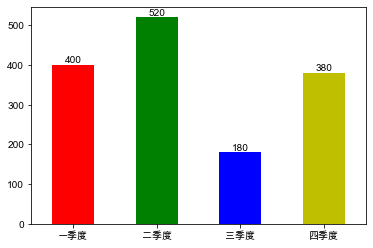

In [13]:
ser9 = pd.Series({'一季度': 400, '二季度': 520, '三季度': 180, '四季度': 380})
# 通过Series对象的plot方法绘图（kind='bar'表示绘制柱状图）
ser9.plot(kind='bar', color=['r', 'g', 'b', 'y'])
# x轴的坐标旋转到0度（中文水平显示）
plt.xticks(rotation=0)
# 在柱状图的柱子上绘制数字
for i in range(4):
    plt.text(i, ser9[i] + 5, ser9[i], ha='center')
# 显示图像
plt.show()

#### 饼图

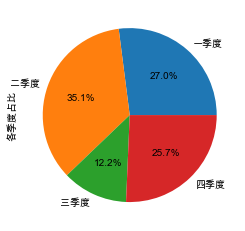

In [14]:
# autopct参数可以配置在饼图上显示每块饼的占比
ser9.plot(kind='pie', autopct='%.1f%%')
# 设置y轴的标签（显示在饼图左侧的文字）
plt.ylabel('各季度占比')
plt.yticks(rotation=0)
plt.show()